#About Dataset
This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns -

1)Label : is the class i.e. categories name

2)Text : the datapoint of that class. The data point is the product and description from the e-commerce website.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#read csv file
df=pd.read_csv("/content/drive/MyDrive/NLP project/ecommerce1.csv")
df.head(10)    #display first 10 entries from dataframe

,Unnamed: 0,label,text
0,14,Household,Indianara Motivational Square Synthetic Wood A...
1,24,Household,Indianara Motivational Square Synthetic Wood A...
2,35,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
3,42,Household,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...
4,43,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
5,55,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
6,70,Household,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...
7,72,Household,ESP Creation Friends Paper Poster (Multicolour...
8,73,Household,"Posterboy 'Chimps' Poster (30.5 cm x 45.7 cm, ..."
9,75,Household,"100yellow Paper Buddha Posters, 12x18 Inches (..."


In [ ]:
df.shape  #display no. of rows and cols

(11719, 3)

In [ ]:
df.info()  #display total entrie,null values,datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719 entries, 0 to 11718
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11719 non-null  int64 
 1   label       11719 non-null  object
 2   text        11719 non-null  object
dtypes: int64(1), object(2)
memory usage: 274.8+ KB


In [ ]:
df.isnull().sum()    #checking if null values/missing values present

Unnamed: 0    0
label         0
text          0
dtype: int64

In [ ]:
df=df.drop(["Unnamed: 0"],axis=1)    #deleting column

In [ ]:
df.head()    #display first 5 entries

,label,text
0,Household,Indianara Motivational Square Synthetic Wood A...
1,Household,Indianara Motivational Square Synthetic Wood A...
2,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
3,Household,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...
4,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."


In [ ]:
df['label'].value_counts()  #categorywise value count

Books                     4186
Household                 3256
Clothing & Accessories    2433
Electronics               1844
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

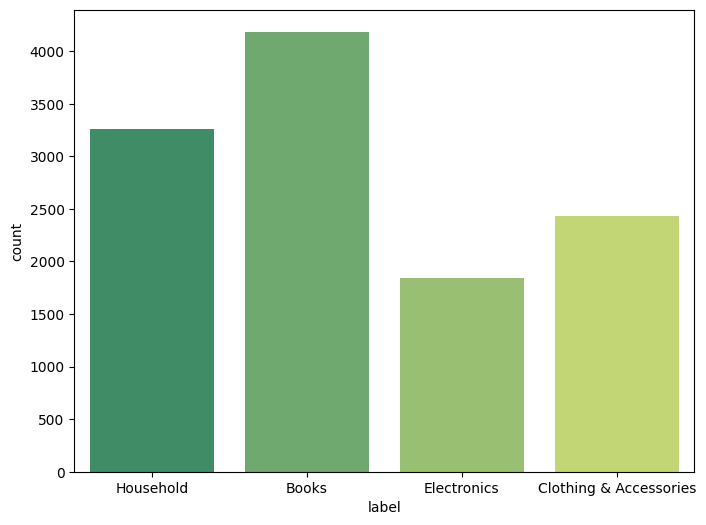

In [ ]:
plt.rcParams["figure.figsize"] = 8,6
sn.countplot(data=df,x="label",palette="summer")

Books category having large number of counting than others

In [ ]:
#  labelwise category 
Household = " ".join(df[df["label"] == "Household"]["text"])    #joins all the tokens and converted into a string
Books = " ".join(df[df["label"] == "Books"]["text"])
Clothing_Accessories = " ".join(df[df["label"] == "Clothing & Accessories"]["text"])
Electronics = " ".join(df[df["label"] == "Electronics"]["text"])

#Visualisation

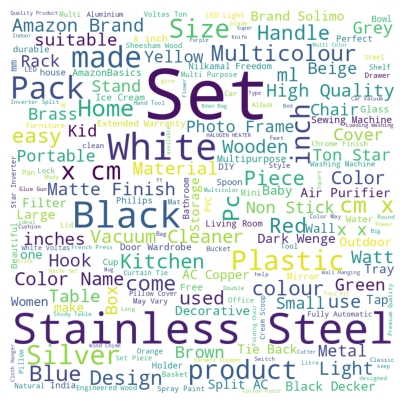

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(Household)      #generates worldcloud for household

plt.figure(figsize=(7,5))    #width and height of worldcloud
plt.imshow(wc) 
plt.axis("off")               #hides the X and Y axis
plt.show()                        

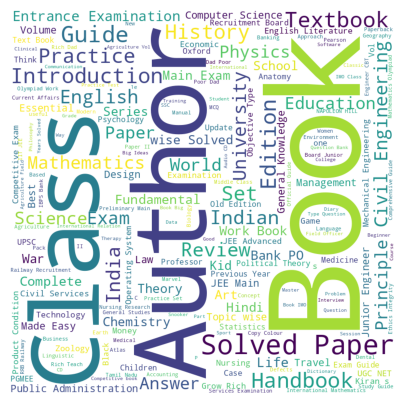

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(Books)

plt.figure(figsize=(7,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

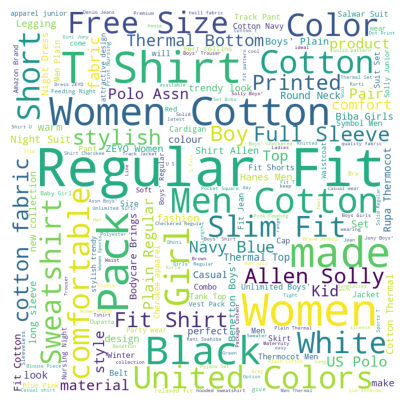

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(Clothing_Accessories)

plt.figure(figsize=(7,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

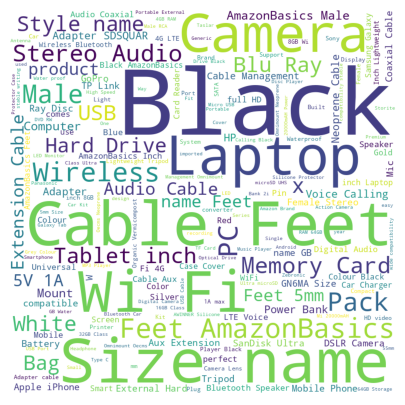

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(Electronics)

plt.figure(figsize=(7,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
df = df[['text','label']]
df.head()

,text,label
0,Indianara Motivational Square Synthetic Wood A...,Household
1,Indianara Motivational Square Synthetic Wood A...,Household
2,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x...",Household
3,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...,Household
4,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x...",Household


In [ ]:
# split feature and target

X = df["text"]
y = df["label"]
#  train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)


#CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words="english")

In [ ]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
X_train_cv

<9375x12850 sparse matrix of type '<class 'numpy.int64'>'
	with 99194 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_cv, y_train)   #calculation 

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test_cv)   

In [ ]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.96      0.98      0.97       823
Clothing & Accessories       0.97      0.95      0.96       451
           Electronics       0.97      0.87      0.92       397
             Household       0.91      0.95      0.93       673

              accuracy                           0.95      2344
             macro avg       0.95      0.94      0.94      2344
          weighted avg       0.95      0.95      0.95      2344



#Prediction

In [ ]:
txt1 = "Lyra cotton legings large-fit"
txt2 = "wall hanging decorator,wooden plant stand"
txt3 = "The Wings of Fire,Pappilon,Forb"
txt4 = "Earphone,camera 8pixel,Hard disk"

In [ ]:
def predict_text(txt):                   #function for prediction
  txt_cv = cv.transform([txt])
  return model.predict(txt_cv)[0]

In [ ]:
predict_text(txt1)

'Clothing & Accessories'

In [ ]:
predict_text(txt2)

'Household'

In [ ]:
predict_text(txt3)

'Books'

In [ ]:
predict_text(txt4)

'Electronics'